# Libraries to Import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Transportation Planning

**Gravity Model** 

$$ T_{ij} = P_i\left[\frac{A_j F_{ij} k_{ij}}{\sum_{j}{A_j F_{ij} k_{ij}}}\right] \\ $$

- T_ij = Number of trips that are produced in zone i and attracted to zone j
- Pi = Total number of trips produced in zone i
- Aj = Number of trips attracted to zone j 
- F_ij = Value that is an inverse function of travel time between zones i and j
- K_ij = Socioeconomic adjustment factor for interchange ij 

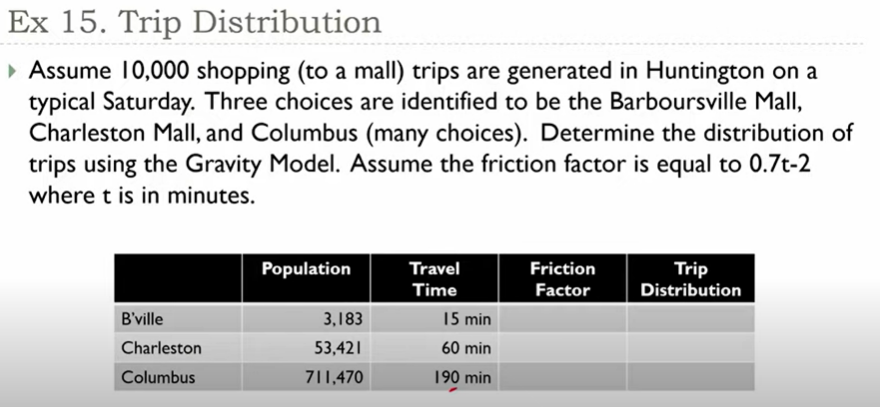

$$ f =  0.7t^{-2} $$

In [2]:
P = 10000 # Number of passengers so this is Pij

In [3]:
# Note this should be 0.7t^-2
data = pd.read_excel('datasets/trip_distribution.xlsx')
data.head()

,Cities,Population,Travel Time,Friction_Factor,Trip Distribution
0,B'ville,3183,15,NaN,NaN
1,Charleston,53421,60,NaN,NaN
2,Columbus,711470,190,NaN,NaN


In [4]:
data['Friction_Factor'] = 0.7*1/(data['Travel Time']**2)
data

,Cities,Population,Travel Time,Friction_Factor,Trip Distribution
0,B'ville,3183,15,0.003111,NaN
1,Charleston,53421,60,0.000194,NaN
2,Columbus,711470,190,0.000019,NaN


In [5]:
data.keys()

Index(['Cities', 'Population', 'Travel Time', 'Friction_Factor',
       'Trip Distribution'],
      dtype='object')

In [8]:
denom = np.sum(data['Population']*data['Friction_Factor'])
data['Trip Distribution'] = P*(data['Population']*data['Friction_Factor']/denom)
data

,Cities,Population,Travel Time,Friction_Factor,Trip Distribution
0,B'ville,3183,15,0.003111,2905.209051
1,Charleston,53421,60,0.000194,3047.423278
2,Columbus,711470,190,0.000019,4047.367671


In [16]:
data.to_excel('datasets/trip_distribution_modified.xlsx')

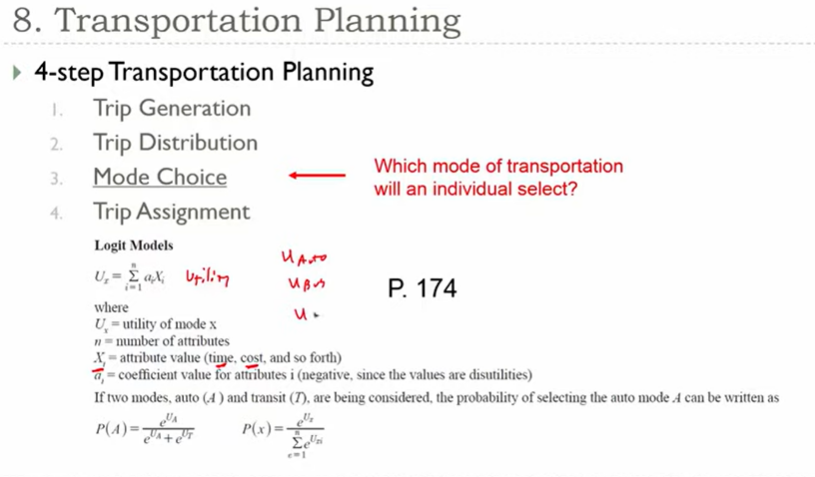

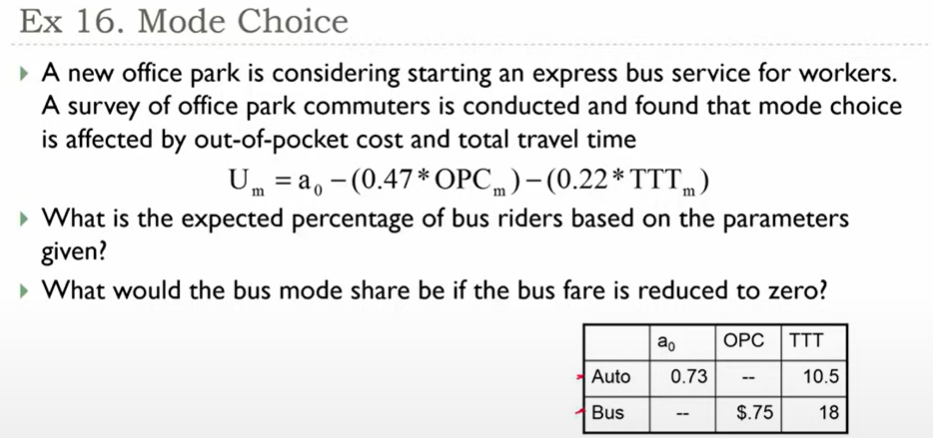